In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

###  Step 1: Data Preparation

In [2]:
#Generate Time Series Data (Sine Wave)
np.random.seed(42)

# Generate a sine wave with noise
t = np.linspace(0, 100, 500)
data = np.sin(t) + 0.1 * np.random.randn(len(t))

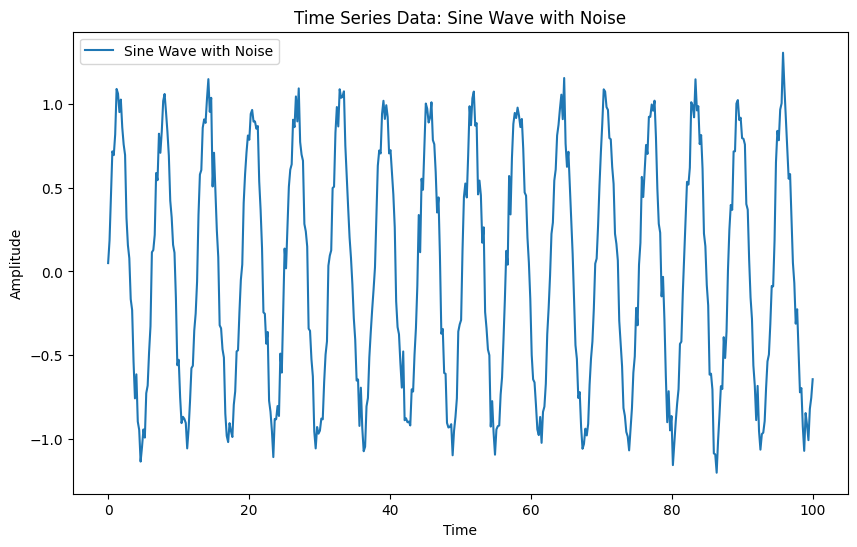

In [3]:
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(t, data, label='Sine Wave with Noise')
plt.title('Time Series Data: Sine Wave with Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Step 2: Data Pre-Processing

In [4]:

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

In [5]:
# Create sequences for GRU
sequence_length = 20  # Adjust the sequence length based on your preference
X, y = [], []
for i in range(len(data_normalized) - sequence_length):
    X.append(data_normalized[i:i+sequence_length, 0])
    y.append(data_normalized[i+sequence_length, 0])

X, y = np.array(X), np.array(y)

In [6]:
# Reshape the input data for GRU (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

### Train - Test Split

In [7]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Step 3: GRU (Build & Train the Model)

In [8]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 20, 50)            7950      
                                                                 
 gru_1 (GRU)                 (None, 20, 50)            15300     
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 38601 (150.79 KB)
Trainable params: 38601 (150.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),verbose=True)

Epoch 1/50
13/13 [==============================] - 15s 196ms/step - loss: 0.1344 - val_loss: 0.0674
Epoch 2/50
13/13 [==============================] - 0s 34ms/step - loss: 0.0518 - val_loss: 0.0422
Epoch 3/50
13/13 [==============================] - 0s 33ms/step - loss: 0.0383 - val_loss: 0.0330
Epoch 4/50
13/13 [==============================] - 0s 34ms/step - loss: 0.0266 - val_loss: 0.0209
Epoch 5/50
13/13 [==============================] - 0s 35ms/step - loss: 0.0121 - val_loss: 0.0046
Epoch 6/50
13/13 [==============================] - 0s 32ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 7/50
13/13 [==============================] - 0s 34ms/step - loss: 0.0028 - val_loss: 0.0036
Epoch 8/50
13/13 [==============================] - 0s 33ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 9/50
13/13 [==============================] - 0s 34ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 10/50
13/13 [==============================] - 0s 33ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 1

### Evaluating Model

In [11]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

3/3 [==============================] - 0s 10ms/step


In [12]:
# Inverse transform predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


### Let's Plot the Results

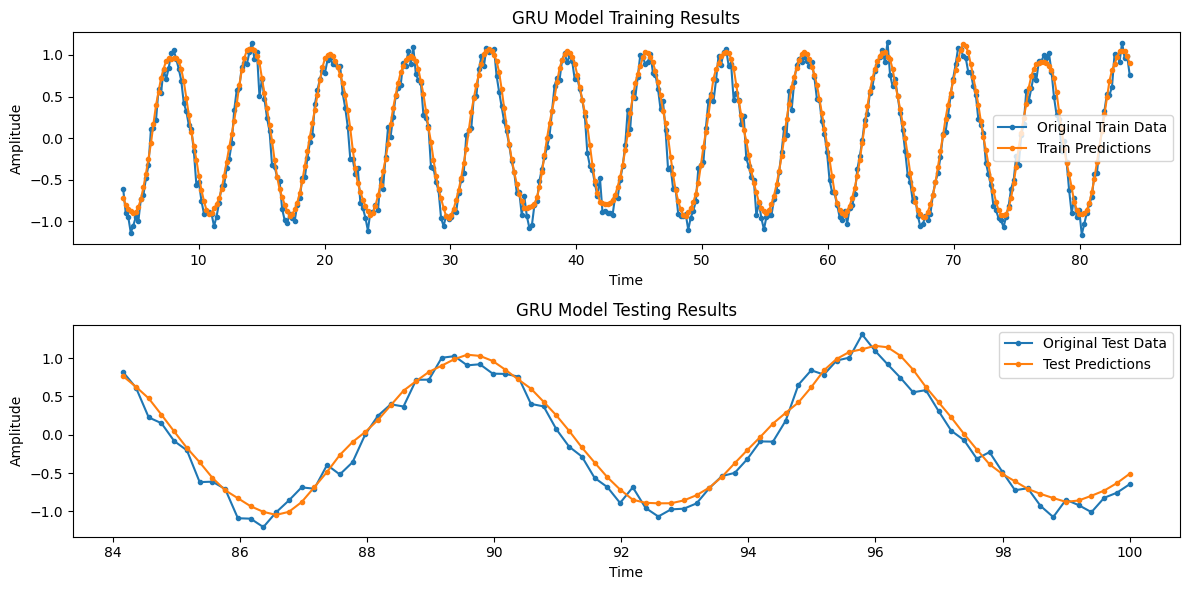

In [15]:
# Visualize the results
plt.figure(figsize=(12, 6))

# Training results
plt.subplot(2, 1, 1)
plt.plot(t[sequence_length:train_size + sequence_length], y_train_original, label='Original Train Data', marker='.')
plt.plot(t[sequence_length:train_size + sequence_length], train_predictions, label='Train Predictions', marker='.')
plt.title('GRU Model Training Results')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Testing results
plt.subplot(2, 1, 2)
plt.plot(t[train_size + sequence_length:], y_test_original, label='Original Test Data', marker='.')
plt.plot(t[train_size + sequence_length:], test_predictions, label='Test Predictions', marker='.')
plt.title('GRU Model Testing Results')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
